In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)


path = r"C:\Users\matia\ironhack\Proyecto-Tiburoncin\attacks.csv"


data = pd.read_csv(path,encoding='latin1')

In [2]:
#Datos generales
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


In [4]:
data.shape

(25723, 24)

In [5]:
data.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [6]:
nan_cols = data.isna().sum()

nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [7]:
#Busco y cambio aquellas filas donde todos sus ingresos sean nulos
#llamo a los datos inutil cuando la fila es completamente nula
filas_nulas= data[data.isnull().all(axis=1)]

data.fillna('inutil', inplace=True)


In [8]:
#Cree nuevo df llamado data_sin_inutil quitando la filas que tienen todos sus valores nulos
#quitar las filas donde mas del 80% de los valores sea inutil
porcentaje_inutil = (data == 'inutil').mean(axis=1)

data_sin_inutil = data[porcentaje_inutil <= 0.8]

data_sin_inutil


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,inutil,inutil
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,inutil,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,inutil,inutil
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,inutil,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,inutil,inutil
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,inutil,Minor injury to lower leg,N,inutil,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,inutil,inutil
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,inutil,Lacerations to leg & hand shark PROVOKED INCIDENT,N,inutil,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,inutil,inutil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,inutil,FATAL,Y,inutil,inutil,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,inutil,inutil
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,inutil,Pearl diving,Ahmun,M,inutil,FATAL,Y,inutil,inutil,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,inutil,inutil
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,inutil,FATAL,Y,inutil,inutil,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,inutil,inutil
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,inutil,"Panama Bay 8ºN, 79ºW",inutil,Jules Patterson,M,inutil,FATAL,Y,inutil,inutil,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,inutil,inutil


In [9]:
#Ver que hacer con los inutiles que quedaron en el nuevo df
cantidad_inutiles = (data_sin_inutil == 'inutil').sum().sum()
cantidad_inutiles

24580

In [10]:
#Completo los inutiles de la columna Activity como actividad desconocida
data_sin_inutil.loc[data_sin_inutil['Activity'] == 'inutil', 'Activity'] = 'actividad_desconocida'


In [11]:
#En la columna de Type llevo todo a solo tres posibilidades, provoked unprovoked e desconocida. Segun mi criterio
data_sin_inutil['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'inutil', 'Boat', 'Boatomg'], dtype=object)

In [12]:
#Voy a eliminar las filas en las cuales la muerte sea invalid ya que no fue un ataque de tiburon y no me interesa
data_sin_inutil = data_sin_inutil.drop(data_sin_inutil[data_sin_inutil['Type'] == 'Invalid'].index)


In [13]:
data_sin_inutil['Type'] = data_sin_inutil['Type'].replace({
    'Boating': 'unprovoked',
    'Unprovoked': 'unprovoked',
    'Invalid': 'desconocida',
    'Provoked': 'provoked',
    'Questionable': 'provoked',
    'Sea Disaster': 'unprovoked',
    'inutil': 'desconocida',
    'Boat': 'unprovoked',
    'Boatomg': 'unprovoked'
})

data_sin_inutil['Type'].unique()


array(['unprovoked', 'provoked', 'desconocida'], dtype=object)

In [14]:
#Me fijo en country si tengo algun inutil
data_sin_inutil[data_sin_inutil['Country'] == 'inutil'].shape
#Tengo 50 ingresos en country con inutil, los completo con ciudad desconocida

(45, 24)

In [15]:
data_sin_inutil['Country'] = data_sin_inutil['Country'].replace({
    'inutil': 'desconocida'})
data_sin_inutil[data_sin_inutil['Country'] == 'inutil'].shape
#No hay mas inutil en la columna country

(0, 24)

In [16]:
#Me fijo en area si tengo algun inutil
data_sin_inutil[data_sin_inutil['Area'] == 'inutil'].shape


(408, 24)

In [17]:
#Cambio los datos de inutil en area por area_desconocida
data_sin_inutil['Area'] = data_sin_inutil['Area'].replace({
    'inutil': 'desconocida'})
data_sin_inutil[data_sin_inutil['Area'] == 'inutil'].shape

(0, 24)

In [18]:
#Me fijo en location si tengo algun inutil
data_sin_inutil[data_sin_inutil['Location'] == 'inutil'].shape

(487, 24)

In [19]:
#Cambio los datos de inutil en area por location_desconocida
data_sin_inutil['Location'] = data_sin_inutil['Location'].replace({
    'inutil': 'desconocida'})
data_sin_inutil[data_sin_inutil['Location'] == 'inutil'].shape

(0, 24)

In [20]:
#Miro la fila de nombres, e intento cambiar aquellos datos donde no hay nombres o pusieron su sexo por sin_nombre

data_sin_inutil[data_sin_inutil['Name'] == 'inutil'].shape

(155, 24)

In [21]:
data_sin_inutil['Name'].unique()[:200]
##
##
#Falta ver que hacer con name
##
##
##


array(['Julie Wolfe', 'Adyson\xa0McNeely ', 'male', 'Gustavo Ramos ',
       'Chris \x85', 'Jose Ernesto da Silva ', 'Cody High',
       'Trey de Boer', 'Jei Turrell', 'Melisa Brunning', 'female',
       'Adam Murray', 'Matthew Lee', 'Rob Bruce', 'Nathan Burch',
       'Ahmed Rasheed', 'Dylan McWilliams', 'Werner Danielsen',
       'Pablo de Melo', 'Jason Longrass', 'Alejandro Travaglini',
       'Bruce Rowan', 'inutil', 'Shane McConnell', 'Ross Spowart',
       'Luke Guy & Finn Bald', 'Rob Crossland', 'Lachie Brown',
       'Elton Polly', 'Anna Shurapey ', 'Brett Palmer', 'Adam Hoare',
       'Andrew Phipps Newman', 'Mathew Vickers', 'Callum Stewart',
       'Ricardo Ferrari Bulhoes ', 'Justin ', 'Marjorie Mariano',
       'Natalie Jones', 'Sairol  Harun', 'Sarah Illig-Carroll',
       '__ Jimenez', 'Rohina Bhandari', '31 migrants', 'Grigor Azatian',
       'Kaia Anderson', 'Timur Yunusov', 'Charlie Fry',
       'Jesús Cabrera González ', 'Jack Tolley', 'Jason Hartl',
       'Susan Pe

In [22]:
data_sin_inutil['Name'].fillna('Desconocido', inplace=True)

In [23]:
#En la columna sex cambio todos los datos a solo tres posibilidades Female, Masculine y desconocida
data_sin_inutil['Sex '].unique()

array(['F', 'M', 'inutil', 'M ', 'lli', 'N', '.'], dtype=object)

In [24]:
data_sin_inutil['Sex '] = data_sin_inutil['Sex '].replace({
    'F': 'Female',
    'M': 'Masculine',
    'inutil': 'desconocida',
    'M ': 'Masculine',
    'lli': 'lli',
    'N': 'neutral',
    '.': 'desconocida'})
data_sin_inutil = data_sin_inutil.rename(columns={'Sex ' : 'Sex'})

In [25]:
data_sin_inutil['Sex'].unique()

array(['Female', 'Masculine', 'desconocida', 'lli', 'neutral'],
      dtype=object)

In [26]:
#Chequeo la columna age a ver que tiene
data_sin_inutil['Age'].unique()

array(['57', '11', 'inutil', '18', '52', '15', '12', '32', '10', '34',
       '30', '60', '33', '29', '54', '41', '37', '19', '25', '69', '38',
       '55', '35', '45', '40s', '28', '20', '24', '26', '49', '14', '22',
       '7', '31', '17', '40', '13', '42', '3', '50', '46', '16', '82',
       '48', '20s', '21', '51', '39', '58', 'Teen', '47', '61', '65',
       '73', '36', '66', '43', '60s', '9', '72', '59', '6', '64', '23',
       '71', '44', '27', '62', '68', '63', '70', '18 months', '53', '30s',
       '50s', '8', 'teen', '77', '74', '56', '28 & 26', '5', '86',
       '18 or 20', '12 or 13', '46 & 34', '28, 23 & 30', 'Teens',
       '36 & 26', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?',
       '33 or 37', 'mid-30s', ' 30', '7      &    31', ' 28', '20?',
       "60's", '32 & 30', '87', 'Elderly', '75', '74 ', '45 ', '21 or 26',
       '20 ', '>50', '18 to 22', 'adult', '9 & 12', '9 months',
       '25 to 35', '23 & 26', '1', '(adult)', '33 & 37', '25 or 28',
       '30 & 32', 

In [27]:
def manejar_edades(edades):
    # Función para manejar cada elemento de la lista
    def convertir(valor):
        try:
            return int(valor)
        except (ValueError, TypeError):
            return 'desconocido'  # Devolver 'desconocido' si no se puede convertir a entero

    # Aplicar la función a cada elemento del array
    resultado = np.array([convertir(valor) for valor in edades])

    return resultado

In [28]:
data_sin_inutil['Age'] = manejar_edades(data_sin_inutil['Age'])


In [29]:
data_sin_inutil['Age'].unique()

array(['57', '11', 'desconocido', '18', '52', '15', '12', '32', '10',
       '34', '30', '60', '33', '29', '54', '41', '37', '19', '25', '69',
       '38', '55', '35', '45', '28', '20', '24', '26', '49', '14', '22',
       '7', '31', '17', '40', '13', '42', '3', '50', '46', '16', '82',
       '48', '21', '51', '39', '58', '47', '61', '65', '73', '36', '66',
       '43', '9', '72', '59', '6', '64', '23', '71', '44', '27', '62',
       '68', '63', '70', '53', '8', '77', '74', '56', '5', '86', '84',
       '87', '75', '1', '81', '78'], dtype=object)

In [30]:
#data_sin_inutil

In [31]:
#cambio de objeect a int 


#ESTA FORMULA LA PUEDO USAR PARA OTRAS COLUMNAS!!!!!


def convertir_a_entero_o_nan(valor):
    try:
        return int(valor)
    except (ValueError, TypeError):
        return 'desconocido' 

data_sin_inutil['Age'] = data_sin_inutil['Age'].apply(convertir_a_entero_o_nan)

In [32]:
#Voy a marcar grupos de edades segun su intervalo de edad
#Voy a aramar los grupos Menor de edad, en el peak, bajando, en las ultimas
def armar_grupo(edad):
    if isinstance(edad, (int, float)):
        if edad < 18:
            return 'Menor de edad'
        elif 18 <= edad < 40:
            return 'Entre 18 y 40'
        elif 40 <= edad < 65:
            return 'Entre 40 y 65'
        else:
            return 'Mayor de 65'
    else:
        return 'desconocido'  # Devuelve lo distinto

# Aplicar la función a la columna de edades
data_sin_inutil['Age'] = data_sin_inutil['Age'].apply(armar_grupo)

In [33]:
data_sin_inutil['Age'].unique()

array(['Entre 40 y 65', 'Menor de edad', 'desconocido', 'Entre 18 y 40',
       'Mayor de 65'], dtype=object)

In [34]:
#vamos a ver los datos de la columna injury
[data_sin_inutil['Injury'].unique()[:20]]

[array(['No injury to occupant, outrigger canoe and paddle damaged',
        'Minor injury to left thigh', 'Minor injury to lower leg',
        'Lacerations to leg & hand shark PROVOKED INCIDENT',
        'No injury, board bitten', 'FATAL',
        'Minor injury to foot. PROVOKED INCIDENT', 'Lower left leg bitten',
        'Minor injury to foot',
        'Minor bite to hand by captive shark. PROVOKED INCIDENT',
        'Injuries to lower right leg and foot',
        'Severe bite to right forearm',
        'Shallow lacerations to finger PROVOKED INCIDENT',
        'Minor injury, marks on board', 'No injury, surfboard damaged',
        'Minor injury to ankle', 'No injury, shark bit scuba gear',
        'No injury, knocked off board by shark', 'No injury',
        'No injury, shark struck his leg'], dtype=object)]

In [35]:
data_sin_inutil[data_sin_inutil['Fatal (Y/N)'] == 'inutil'].shape

(15, 24)

In [36]:
#Saco los valores inutiles de la columna Fatal
data_sin_inutil['Fatal (Y/N)'] = data_sin_inutil['Fatal (Y/N)'].replace({
    'inutil': 'desconocido'})

In [37]:
data_sin_inutil[data_sin_inutil['Fatal (Y/N)'] == 'inutil'].shape
#Ver si en algun caso algun fatal en esta columna y en el otro este como inutil

(0, 24)

In [38]:
data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,inutil,inutil
1,2018.06.18,18-Jun-2018,2018.0,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,14h00 -15h00,inutil,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,inutil,inutil
3,2018.06.08,08-Jun-2018,2018.0,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,inutil,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,inutil,inutil
4,2018.06.04,04-Jun-2018,2018.0,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,inutil,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,inutil,inutil
5,2018.06.03.b,03-Jun-2018,2018.0,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,inutil,inutil,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,inutil,inutil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,Masculine,desconocido,FATAL,Y,inutil,inutil,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,inutil,inutil
6298,ND.0004,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,desconocida,Pearl diving,Ahmun,Masculine,desconocido,FATAL,Y,inutil,inutil,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,inutil,inutil
6299,ND.0003,1900-1905,0.0,unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,Masculine,desconocido,FATAL,Y,inutil,inutil,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,inutil,inutil
6300,ND.0002,1883-1889,0.0,unprovoked,PANAMA,desconocida,"Panama Bay 8ºN, 79ºW",actividad_desconocida,Jules Patterson,Masculine,desconocido,FATAL,Y,inutil,inutil,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,inutil,inutil


In [39]:
data_sin_inutil['Fatal (Y/N)'].unique()


array(['N', 'Y', 'desconocido', 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [40]:
data_sin_inutil['Fatal (Y/N)'] = data_sin_inutil['Fatal (Y/N)'].replace({
    'M': 'desconocido',
    'UNKNOWN': 'desconocido',
    '2017': 'desconocido',
    ' N': 'N',
    'N ': 'N',
    'y': 'Y',
    })


data_sin_inutil = data_sin_inutil.rename(columns={'Fatal (Y/N)': 'Death'})

In [41]:
data_sin_inutil['Death']

0       N
1       N
3       N
4       N
5       N
       ..
6297    Y
6298    Y
6299    Y
6300    Y
6301    Y
Name: Death, Length: 5755, dtype: object

In [42]:
#Identifico si alguna fila contiene en injury fatal y en la muerte desconocido. En esos casos completo en Death con Y
fatal_injury_rows = data_sin_inutil['Injury'].str.contains('fatal', case=False, na=False)

In [43]:
data_sin_inutil.loc[fatal_injury_rows, 'Death'] = 'Y'

In [44]:
data_sin_inutil['Death'].unique()

array(['N', 'Y', 'desconocido'], dtype=object)

In [45]:
##Vamos a ver la columna Time
data_sin_inutil['Time'].unique()
#saco las palbras para la funcion

array(['18h00', '14h00  -15h00', 'inutil', 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '11h00', '10h30', '10h40', '16h50',
       '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00', '17h35',
       '15h30', '07h30', '19h00, Dusk', 'Night', '16h00', '15h01',
       '12h00', '13h45', '23h30', '09h00', '14h30', '18h30', '12h30',
       '16h30', '18h45', '06h00', '10h00', '10h44', '13h19', '13h30',
       '10h45', '11h20', '07h45', '11h45', '08h30', '15h45',
       'Shortly before 12h00', '17h34', '17h10', '11h15', '17h45',
       '13h00', '10h20', '13h20', '02h00', '09h50', '11h30', '17h30',
       '9h00', '10h43', 'After noon', '15h15', '15h40', '19h05', '1300',
       '14h30 / 15h30', '22h00', '16h20', '14h34', '15h25', '14h55',
       '17h46', 'Morning ', '15h49', '19h00', 'Midnight', '09h30 / 10h00',
       '10h15', '18h15', '04h00', '14h50', '13h50', '10h25',
       '10h45-11h15', '16h45', '15h52', '06h15', '14h40', '08h45',
       'Evening', '12h10', '18h05'

In [46]:
data_sin_inutil[data_sin_inutil['Time'] == 'inutil'].shape

(2962, 24)

In [47]:
#Voy a sacar los inutiles de la columna de tiempo por desconocido
import regex as re

def standarizar_time(data_sin_inutil):
    tiempo = r'(\d{1,2})[h:](\d{2})'
    #voy a hacer grupos para las distintas horas y strings

    def categorizar_time(tiempo_str):

        if 'morning' in tiempo_str.lower() or 'midday' in tiempo_str.lower() or 'daybreak' in tiempo_str.lower() or '1300' in tiempo_str.lower():
            return 'de_mañana'
        if 'noon' in tiempo_str.lower() or 'lunch' in tiempo_str.lower() or 'afternon' in tiempo_str.lower() or '1500' in tiempo_str.lower():
            return 'medio_dia'
        if 'night' in tiempo_str.lower() or 'dark' in tiempo_str.lower() or '0500' in tiempo_str.lower():
            return 'noche'
        if 'sunset' in tiempo_str.lower() or 'evening' in tiempo_str.lower() or 'sundown' in tiempo_str.lower():
            return 'tarde'
    
        match = re.search(tiempo, tiempo_str)

        if match:
            hour = int(match.group(1))
            minute = int(match.group(2))
            
            if 6 <= hour < 12:
                return 'mañana'
            elif 12 <= hour < 18:
                return 'tarde'
            else:
                return 'noche'
        else:
            return 'desconocido' 

    # Aplicar la función categorizar_time a la columna 'Time'
    data_sin_inutil['Time'] = data_sin_inutil['Time'].apply(categorizar_time)

# Llamar a la función standarizar_time con tu DataFrame
standarizar_time(data_sin_inutil)  #cualquier otro caso que no sea ni numero ni las string que indique return desconocido
    


In [48]:
data_sin_inutil['Time'] = data_sin_inutil['Time'].astype(str)

In [49]:
data_sin_inutil['Time'].unique()


array(['noche', 'tarde', 'desconocido', 'medio_dia', 'de_mañana',
       'mañana'], dtype=object)

In [50]:
#Vamos a investigar en la columna de especies 
data_sin_inutil['Species '].unique()

array(['White shark', 'inutil', '2 m shark', ..., "12' tiger shark",
       'Blue pointers',
       'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable'],
      dtype=object)

In [51]:
conteo_valores = data_sin_inutil['Species '].value_counts()

# Filtra solo los valores 'inutiles' si es necesario
cantidad_inutiles = conteo_valores.get('inutil', 0)
cantidad_inutiles

2817

In [52]:
data_sin_inutil['Species '] = data_sin_inutil['Species '].replace({
    'inutil': 'desconocido'})

In [53]:
data_sin_inutil['Species '].unique()[:100]

array(['White shark', 'desconocido', '2 m shark', 'Tiger shark, 3m',
       'Tiger shark', "Lemon shark, 3'", "Bull shark, 6'",
       'Grey reef shark', 'Tawny nurse shark, 2m',
       'Shark involvement not confirmed', 'Questionable', '3 m shark',
       'White shark, 3.5 m', 'White shark, 2.5 m', "6' shark",
       'Juvenile bull shark', 'Bull shark', "Tiger shark, 12'",
       'Wobbegong shark', '3.5 m shark', '1.8 m shark', 'Blacktip shark',
       'Juvenile white shark,  2.7 to 3.2 m', 'Bull shark, 2 m',
       'Galapagos shark?', 'Bull shark, 3 m ', 'Grey reef shark. 2 m',
       'small shark', 'Wobbegong shark?', 'Juvenile nurse shark',
       "Nurse shark. 5'", 'Tiger shark, female',
       'Some drowned but other may have been killed by blue sharks',
       'White shark, 4.6 m', 'Cookiecutter shark', 'Wobbegong shark, 1 m',
       'White shark, 4.5 m', 'Spinner shark, 4 to 5 feet',
       'Tiger shark, 8 to 10 feet', "8' shark", "5' shark",
       "4' to 5' shark", 'Porbeagle

In [54]:
#Voy a ver la columna de investigadores
investigator_value_counts = data_sin_inutil['Investigator or Source'].value_counts(dropna=False)

investigator_value_counts.head(20)
#Voy a borrar los valores inutiles que son solo 13
data_sin_inutil = data_sin_inutil[data_sin_inutil['Investigator or Source'] != 'inutil']

In [55]:
data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Death,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,noche,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,inutil,inutil
1,2018.06.18,18-Jun-2018,2018.0,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,tarde,desconocido,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,inutil,inutil
3,2018.06.08,08-Jun-2018,2018.0,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,desconocido,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,inutil,inutil
4,2018.06.04,04-Jun-2018,2018.0,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,desconocido,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,inutil,inutil
5,2018.06.03.b,03-Jun-2018,2018.0,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,inutil,inutil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,inutil,inutil
6298,ND.0004,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,desconocida,Pearl diving,Ahmun,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,inutil,inutil
6299,ND.0003,1900-1905,0.0,unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,inutil,inutil
6300,ND.0002,1883-1889,0.0,unprovoked,PANAMA,desconocida,"Panama Bay 8ºN, 79ºW",actividad_desconocida,Jules Patterson,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,inutil,inutil


In [56]:
#Veo la columna case number
data_sin_inutil['Case Number'].unique()

array(['2018.06.25', '2018.06.18', '2018.06.08', ..., 'ND.0003',
       'ND.0002', 'ND.0001'], dtype=object)

In [57]:
data_sin_inutil['Case Number'].value_counts()

1915.07.06.a.R    2
1980.07.00        2
1990.05.10        2
1907.10.16.R      2
2014.08.02        2
                 ..
1999.10.30.a      1
1999.10.30.b      1
1999.11.00.a      1
1999.11.00.b      1
ND.0001           1
Name: Case Number, Length: 5730, dtype: int64

In [58]:
def formato_limpio(case_number):
    # Check if the case number matches the expected format
    if re.match(r"\d{4}\.\d{2}\.\d{2}(\.[a-z])?$", case_number):
        return case_number
    else:
        return "Formato no válido"
    

In [59]:
#Aplico la formula para tener la columna con datos correctos
data_sin_inutil['Case Number'] = data_sin_inutil['Case Number'].apply(formato_limpio)

In [60]:
data_sin_inutil['Case Number'].value_counts()

Formato no válido    641
1990.05.10             2
1966.12.26             2
1923.00.00.a           2
2012.09.02.b           2
                    ... 
2001.04.08.b           1
2001.04.10             1
2001.04.11.a           1
2001.04.11.c           1
0005.00.00             1
Name: Case Number, Length: 5092, dtype: int64

In [61]:
data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Death,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,noche,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,inutil,inutil
1,2018.06.18,18-Jun-2018,2018.0,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,tarde,desconocido,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,inutil,inutil
3,2018.06.08,08-Jun-2018,2018.0,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,desconocido,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,inutil,inutil
4,2018.06.04,04-Jun-2018,2018.0,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,desconocido,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,inutil,inutil
5,2018.06.03.b,03-Jun-2018,2018.0,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,inutil,inutil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Formato no válido,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,inutil,inutil
6298,Formato no válido,Before 1903,0.0,unprovoked,AUSTRALIA,Western Australia,desconocida,Pearl diving,Ahmun,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,inutil,inutil
6299,Formato no válido,1900-1905,0.0,unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,inutil,inutil
6300,Formato no válido,1883-1889,0.0,unprovoked,PANAMA,desconocida,"Panama Bay 8ºN, 79ºW",actividad_desconocida,Jules Patterson,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,inutil,inutil


In [62]:
date_numero_inutil = data_sin_inutil['Date']=='inutil'
date_numero_inutil.sum()
#No tiene valores inutiles

0

In [63]:
data_sin_inutil['Death'].fillna('Desconocido', inplace=True)

In [64]:
data_sin_inutil['Year'].unique()

array([2018.0, 2017.0, 2016.0, 2015.0, 2014.0, 2013.0, 2012.0, 2011.0,
       2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0, 2003.0,
       2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0, 1995.0,
       1984.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0, 1988.0,
       1987.0, 1986.0, 1985.0, 1983.0, 1982.0, 1981.0, 1980.0, 1979.0,
       1978.0, 1977.0, 1976.0, 1975.0, 1974.0, 1973.0, 1972.0, 1971.0,
       1970.0, 1969.0, 1968.0, 1967.0, 1966.0, 1965.0, 1964.0, 1963.0,
       1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0, 1955.0,
       1954.0, 1953.0, 1952.0, 1951.0, 1950.0, 1949.0, 1948.0, 1848.0,
       1947.0, 1946.0, 1945.0, 1944.0, 1943.0, 1942.0, 1941.0, 1940.0,
       1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0, 1932.0,
       1931.0, 1930.0, 1929.0, 1928.0, 1927.0, 1926.0, 1925.0, 1924.0,
       1923.0, 1922.0, 1921.0, 1920.0, 1919.0, 1918.0, 1917.0, 1916.0,
       1915.0, 1914.0, 1913.0, 1912.0, 1911.0, 1910.0, 1909.0, 1908.0,
      

In [65]:
year_value_counts = data_sin_inutil['Year'].value_counts(dropna=False)
year_value_counts

2015.0    129
0.0       123
2017.0    121
2016.0    120
2014.0    118
         ... 
1787.0      1
1786.0      1
1785.0      1
1784.0      1
inutil      1
Name: Year, Length: 244, dtype: int64

In [66]:
#Donde los valores son [500.0, 77.0, 5.0, 0.0] corregirlos con la columna date y saco los .0 para todos
import datetime
def clean_year(row):
    if row['Year'] in [500.0, 77.0, 5.0, 0.0, 'inutil']:
        if isinstance(row['Date'], datetime.date):
            return str(row['Date'].year)
        else:
            return "Formato no válido"
    else:
        return str(int(row['Year'])) if not pd.isnull(row['Year']) else None

# Apply the function to the 'Year' column
data_sin_inutil['Year'] = data_sin_inutil.apply(clean_year, axis=1)


In [67]:
year_value_counts = data_sin_inutil['Year'].value_counts(dropna=False)
year_value_counts


2015                 129
Formato no válido    127
2017                 121
2016                 120
2014                 118
                    ... 
1791                   1
1788                   1
1787                   1
1786                   1
1543                   1
Name: Year, Length: 240, dtype: int64

In [68]:
#Voy a quitar las columnas que tengan formato invalido ya que para mi objetivo me importan las fechas
data_sin_inutil = data_sin_inutil[data_sin_inutil['Year'] != "Formato no válido"]
data_sin_inutil.shape

(5615, 24)

In [69]:
#Voy a sobreescribir la columna Unnamed 22 para categorizar los tipos de muerte segun la actividad que realizan. Dividire en oscio deporte o desconocido

def categorize_activity(activity):
    
    activity = str(activity).lower()
    
    ocio = ['snorkeling', 'swimming', 'bathing', 'playing', 'paddling', 'bodysurfing']
    deporte = ['diving', 'fishing', 'spearfishing', 'wading', 'boating', 'canoeing', 'kayaking', 'rowing', 'sailing', 'yachting','surfing', 'paddling']
    
    
    if any(keyword in activity for keyword in ocio):
        return "Ocio"
    elif any(keyword in activity for keyword in deporte):
        return "Deporte"
    else:
        return "Desconocido"

# Aplica la función para crear la nueva columna "Activity Category"
data_sin_inutil['Unnamed: 22'] = data_sin_inutil['Activity'].apply(categorize_activity)

data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Death,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,noche,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Ocio,inutil
1,2018.06.18,18-Jun-2018,2018,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,tarde,desconocido,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Desconocido,inutil
3,2018.06.08,08-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,desconocido,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Deporte,inutil
4,2018.06.04,04-Jun-2018,2018,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,desconocido,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Deporte,inutil
5,2018.06.03.b,03-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,Deporte,inutil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6169,1595.00.00,1595,1595,unprovoked,INDIA,Kerala,River Cochin,Ship lay at anchor & man was working on its ru...,male,Masculine,desconocido,"Leg severed mid-thigh, hand severed, arm above...",desconocido,desconocido,desconocido,The Voyage of John Huyghen van Linschoten,1595.00.00-Cochin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1595.00.00,1595.00.00,134.0,Desconocido,inutil
6170,Formato no válido,Letter dated 10-Jan-1580,1580,unprovoked,Between PORTUGAL & INDIA,desconocida,desconocida,Man fell overboard from ship. Those on board t...,male,Masculine,desconocido,"FATAL. ""Shark tore him to pieces.",Y,desconocido,desconocido,"G.P. Whitley, p. 10",1580.01.10.R-Portugal-India.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1580.01.10.R,1580.01.10.R,133.0,Desconocido,inutil
6171,1555.00.00,1555,1555,unprovoked,desconocida,desconocida,desconocida,Swimming,male,Masculine,desconocido,inutil,desconocido,desconocido,desconocido,Olaus Magnus,1555.00.00 - Olaus Magnus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1555.00.00,1555.00.00,132.0,Ocio,inutil
6172,1554.00.00,Ca. 1554,1554,unprovoked,FRANCE,Nice & Marseilles,desconocida,actividad_desconocida,males (wearing armor),Masculine,desconocido,inutil,desconocido,desconocido,Possibly white sharks,G. Rondelet,1554.00.00-Rondelet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1554.00.00,1554.00.00,131.0,Desconocido,inutil


In [70]:

#y ahora sobreescribo la columna unnamed 23 para ver en que oceano paso la muerte 
data_sin_inutil['Country'].value_counts()

USA                         2014
AUSTRALIA                   1200
SOUTH AFRICA                 504
PAPUA NEW GUINEA             129
NEW ZEALAND                  115
                            ... 
NORTH SEA                      1
RED SEA / INDIAN OCEAN         1
BRITISH WEST INDIES            1
ADMIRALTY ISLANDS              1
Between PORTUGAL & INDIA       1
Name: Country, Length: 199, dtype: int64

In [71]:
def categorize_country_to_ocean(country):
    # Diccionario que mapea países a océanos
    country_to_ocean = {
        'USA': 'Pacific',
        'AUSTRALIA': 'Indian',
        'MEXICO': 'Pacific',
        'BRAZIL': 'Atlantic',
        'SOUTH AFRICA': 'Indian',
        'THAILAND': 'Indian',
        'COSTA RICA': 'Pacific',
        'MALDIVES': 'Indian',
        'BAHAMAS': 'Atlantic',
        'NEW CALEDONIA': 'Pacific',
        'ECUADOR': 'Pacific',
        'MALAYSIA': 'Indian',
        'LIBYA': 'Mediterranean',
        'desconocida': 'Desconocido',
        'CUBA': 'Atlantic',
        'MAURITIUS': 'Indian',
        'NEW ZEALAND': 'Pacific',
        # Agrega más mapeos aquí según tus datos

    }
    return country_to_ocean.get(country.upper(), 'Desconocido')

data_sin_inutil['Unnamed: 23'] = data_sin_inutil['Country'].apply(categorize_country_to_ocean)


In [72]:
data_sin_inutil['Unnamed: 23'].value_counts()

Pacific          2282
Indian           1726
Desconocido      1358
Atlantic          244
Mediterranean       5
Name: Unnamed: 23, dtype: int64

In [73]:
#Como me interesa solo los valores de las ciudades que marque las cuales son las que tienen mayor numero de muertes voy a borrar aquellas filas que tiene oceano desconocido
data_sin_inutil = data_sin_inutil[data_sin_inutil['Unnamed: 23'] != 'Desconocido']

In [74]:
data_sin_inutil['Death'].value_counts()
#voy a borrar las muertes desconocidas ya que para mi objetivo no me sirven
data_sin_inutil = data_sin_inutil[data_sin_inutil['Death'] != 'desconocido']

In [75]:
data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Death,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,noche,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Ocio,Pacific
1,2018.06.18,18-Jun-2018,2018,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,tarde,desconocido,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Desconocido,Pacific
3,2018.06.08,08-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,desconocido,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Deporte,Indian
4,2018.06.04,04-Jun-2018,2018,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,desconocido,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Deporte,Pacific
5,2018.06.03.b,03-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,Deporte,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,1779.00.00,1779,1779,unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,Masculine,desconocido,"FATAL, buttock lacerated",Y,desconocido,desconocido,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,160.0,Deporte,Pacific
6146,Formato no válido,Reported 12-Jul-1771,1771,unprovoked,USA,desconocida,Damiscotte,Fishing,male,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"C. Moore, GSAF",1771.07.12.R-Damiscotte.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1771.07.12.R,1771.07.12.R,157.0,Deporte,Pacific
6151,1751.07.27,27-Jul-1751,1751,unprovoked,USA,Massachusetts,desconocida,Swimming,male,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"Pennsylvania Gazette, 8/15/1751",1751.07.27-Massachusetts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1751.07.27,1751.07.27,152.0,Ocio,Pacific
6152,1749.00.00,1749,1749,unprovoked,CUBA,Havana Province,Havana Harbor,Swimming,Brook Watson,Masculine,Menor de edad,Right leg severed at knee. In 1796 he became ...,N,desconocido,desconocido,GSAF,1749.00.00-Watson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1749.00.00,1749.00.00,151.0,Ocio,Atlantic


In [76]:
data_sin_inutil['Activity'].value_counts()

Surfing                                                                                                               875
Swimming                                                                                                              562
Fishing                                                                                                               281
actividad_desconocida                                                                                                 219
Spearfishing                                                                                                          214
                                                                                                                     ... 
Inspecting teeth of supposedly dead (hooked & shot) shark                                                               1
Diving to untangle a crab trap line from boat's propeller                                                               1
16' catamaran capsized p

In [77]:
#Borro las actividades que son desconocidas
data_sin_inutil = data_sin_inutil[data_sin_inutil['Activity'] != 'actividad_desconocida']

In [78]:
data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Death,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,noche,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Ocio,Pacific
1,2018.06.18,18-Jun-2018,2018,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,tarde,desconocido,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Desconocido,Pacific
3,2018.06.08,08-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,desconocido,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Deporte,Indian
4,2018.06.04,04-Jun-2018,2018,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,desconocido,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Deporte,Pacific
5,2018.06.03.b,03-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,Deporte,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,1779.00.00,1779,1779,unprovoked,USA,Hawaii,"Maliu, Hawai'i",Surfing,Nu'u-anu-pa'a hu,Masculine,desconocido,"FATAL, buttock lacerated",Y,desconocido,desconocido,"G.H. Balazs; J. Borg, p.68; L. Taylor (1993), ...",1779.00.00-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1779.00.00,1779.00.00,160.0,Deporte,Pacific
6146,Formato no válido,Reported 12-Jul-1771,1771,unprovoked,USA,desconocida,Damiscotte,Fishing,male,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"C. Moore, GSAF",1771.07.12.R-Damiscotte.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1771.07.12.R,1771.07.12.R,157.0,Deporte,Pacific
6151,1751.07.27,27-Jul-1751,1751,unprovoked,USA,Massachusetts,desconocida,Swimming,male,Masculine,desconocido,FATAL,Y,desconocido,desconocido,"Pennsylvania Gazette, 8/15/1751",1751.07.27-Massachusetts.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1751.07.27,1751.07.27,152.0,Ocio,Pacific
6152,1749.00.00,1749,1749,unprovoked,CUBA,Havana Province,Havana Harbor,Swimming,Brook Watson,Masculine,Menor de edad,Right leg severed at knee. In 1796 he became ...,N,desconocido,desconocido,GSAF,1749.00.00-Watson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1749.00.00,1749.00.00,151.0,Ocio,Atlantic


In [79]:
data_sin_inutil['Year'].unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955',
       '1954', '1953', '1952', '1951', '1950', '1949', '1948', '1947',
       '1946', '1945', '1944', '1943', '1942', '1941', '1940', '1939',
       '1938', '1937', '1936', '1935', '1934', '1933', '1932', '1931',
       '1930', '1929', '1928', '1927', '1926', '1925', '1924', '1923',
       '1922', '1921', '1920', '1919', '1918', '1917', '1916', '1915',
       '1914', '1913', '1912', '1911', '1910', '1909', '1908', '1907',
      

In [80]:
data_sin_inutil['Year'] = data_sin_inutil['Year'].astype(float).astype(int)

# Eliminar las filas donde el año sea mayor que 1950 
data_sin_inutil = data_sin_inutil[data_sin_inutil['Year'] >= 1950]

In [81]:
data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Death,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,noche,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,Ocio,Pacific
1,2018.06.18,18-Jun-2018,2018,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,tarde,desconocido,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,Desconocido,Pacific
3,2018.06.08,08-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,desconocido,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,Deporte,Indian
4,2018.06.04,04-Jun-2018,2018,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,desconocido,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,Deporte,Pacific
5,2018.06.03.b,03-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,Deporte,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,Formato no válido,Reported 12-Jan-1950,1950,unprovoked,AUSTRALIA,Victoria,South Werribee Beach,Swimming,D. Martin,Masculine,desconocido,3 lacerations to heel,N,desconocido,desconocido,"Werribee Shire Banner, 1/12/1950",1950.01.12.R-Martin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1950.01.12.R,1950.01.12.R,1819.0,Ocio,Indian
4485,1950.00.00.m,1950,1950,unprovoked,AUSTRALIA,Tasmania,Triabunna,Sitting on side of dinghy mending a net,Neil Drake,Masculine,desconocido,"No injury to occupant, shark bit side of dinghy",N,desconocido,"White shark, 3.6 m, 420 kg male","C. Black, GSAF",1950.00.00.m-Drake-dinghy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1950.00.00.m,1950.00.00.m,1818.0,Desconocido,Indian
4490,1950.00.00.h,1950,1950,unprovoked,USA,Florida,"Jacksonville Beach, Duval County",Standing,George Carter,Masculine,desconocido,Arm bitten,N,desconocido,desconocido,"Florida Times-Union (Jacksonville), 6/6/1961",1950.00.00.h-Carter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1950.00.00.h,1950.00.00.h,1813.0,Desconocido,Pacific
4495,1950.00.00.c,1950,1950,unprovoked,NEW CALEDONIA,North Province,"Voh, near meatworks","Spearfishing, but walking carrying fish on end...",male,Masculine,desconocido,"Shark jumped from sea, taking fish & his right...",N,desconocido,desconocido,"V.M. Coppleson (1958), p.262; V.M. Coppleson (...",1950.00.00.c-NewCaledonia-Voh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1950.00.00.c,1950.00.00.c,1808.0,Deporte,Pacific


In [82]:
data_sin_inutil['pdf'].unique()

array(['2018.06.25-Wolfe.pdf', '2018.06.18-McNeely.pdf',
       '2018.06.08-Arrawarra.pdf', ..., '1950.00.00.h-Carter.pdf',
       '1950.00.00.c-NewCaledonia-Voh.pdf',
       '1950.00.00.b-NewCaledonia-Touho.pdf'], dtype=object)

In [83]:
#Completo las columnas 
data_sin_inutil['Case Number.1'] = data_sin_inutil['pdf'].str[5:7]
data_sin_inutil['Case Number.2'] = data_sin_inutil['pdf'].str[8:10]

data_sin_inutil[['pdf', 'Case Number.1', 'Case Number.2']].head()

,pdf,Case Number.1,Case Number.2
0,2018.06.25-Wolfe.pdf,06,25
1,2018.06.18-McNeely.pdf,06,18
3,2018.06.08-Arrawarra.pdf,06,08
4,2018.06.04-Ramos.pdf,06,04
5,2018.06.03.b-FlatRock.pdf,06,03


In [84]:
data_sin_inutil = data_sin_inutil.rename(columns={'Case Number.1': 'Mes', 'Case Number.2': 'Dia','Unnamed: 22':'Tipo de Actividad','Unnamed: 23':'Oceano'})

In [85]:
data_sin_inutil['Death'].value_counts()

N    2780
Y     312
Name: Death, dtype: int64

In [86]:
data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Death,Time,Species,Investigator or Source,pdf,href formula,href,Mes,Dia,original order,Tipo de Actividad,Oceano
0,2018.06.25,25-Jun-2018,2018,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,noche,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,25,6303.0,Ocio,Pacific
1,2018.06.18,18-Jun-2018,2018,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,tarde,desconocido,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,18,6302.0,Desconocido,Pacific
3,2018.06.08,08-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,desconocido,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,08,6300.0,Deporte,Indian
4,2018.06.04,04-Jun-2018,2018,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,desconocido,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,04,6299.0,Deporte,Pacific
5,2018.06.03.b,03-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,03,6298.0,Deporte,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,Formato no válido,Reported 12-Jan-1950,1950,unprovoked,AUSTRALIA,Victoria,South Werribee Beach,Swimming,D. Martin,Masculine,desconocido,3 lacerations to heel,N,desconocido,desconocido,"Werribee Shire Banner, 1/12/1950",1950.01.12.R-Martin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,01,12,1819.0,Ocio,Indian
4485,1950.00.00.m,1950,1950,unprovoked,AUSTRALIA,Tasmania,Triabunna,Sitting on side of dinghy mending a net,Neil Drake,Masculine,desconocido,"No injury to occupant, shark bit side of dinghy",N,desconocido,"White shark, 3.6 m, 420 kg male","C. Black, GSAF",1950.00.00.m-Drake-dinghy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00,00,1818.0,Desconocido,Indian
4490,1950.00.00.h,1950,1950,unprovoked,USA,Florida,"Jacksonville Beach, Duval County",Standing,George Carter,Masculine,desconocido,Arm bitten,N,desconocido,desconocido,"Florida Times-Union (Jacksonville), 6/6/1961",1950.00.00.h-Carter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00,00,1813.0,Desconocido,Pacific
4495,1950.00.00.c,1950,1950,unprovoked,NEW CALEDONIA,North Province,"Voh, near meatworks","Spearfishing, but walking carrying fish on end...",male,Masculine,desconocido,"Shark jumped from sea, taking fish & his right...",N,desconocido,desconocido,"V.M. Coppleson (1958), p.262; V.M. Coppleson (...",1950.00.00.c-NewCaledonia-Voh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00,00,1808.0,Deporte,Pacific


In [87]:
#from IPython.display import HTML

#HTML(data_sin_inutil.to_html(escape=False))

In [88]:
data_sin_inutil

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Death,Time,Species,Investigator or Source,pdf,href formula,href,Mes,Dia,original order,Tipo de Actividad,Oceano
0,2018.06.25,25-Jun-2018,2018,unprovoked,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,Female,Entre 40 y 65,"No injury to occupant, outrigger canoe and pad...",N,noche,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,25,6303.0,Ocio,Pacific
1,2018.06.18,18-Jun-2018,2018,unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,Menor de edad,Minor injury to left thigh,N,tarde,desconocido,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,18,6302.0,Desconocido,Pacific
3,2018.06.08,08-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Masculine,desconocido,Minor injury to lower leg,N,desconocido,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,08,6300.0,Deporte,Indian
4,2018.06.04,04-Jun-2018,2018,provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,Masculine,desconocido,Lacerations to leg & hand shark PROVOKED INCIDENT,N,desconocido,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,04,6299.0,Deporte,Pacific
5,2018.06.03.b,03-Jun-2018,2018,unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,Masculine,desconocido,"No injury, board bitten",N,desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,06,03,6298.0,Deporte,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,Formato no válido,Reported 12-Jan-1950,1950,unprovoked,AUSTRALIA,Victoria,South Werribee Beach,Swimming,D. Martin,Masculine,desconocido,3 lacerations to heel,N,desconocido,desconocido,"Werribee Shire Banner, 1/12/1950",1950.01.12.R-Martin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,01,12,1819.0,Ocio,Indian
4485,1950.00.00.m,1950,1950,unprovoked,AUSTRALIA,Tasmania,Triabunna,Sitting on side of dinghy mending a net,Neil Drake,Masculine,desconocido,"No injury to occupant, shark bit side of dinghy",N,desconocido,"White shark, 3.6 m, 420 kg male","C. Black, GSAF",1950.00.00.m-Drake-dinghy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00,00,1818.0,Desconocido,Indian
4490,1950.00.00.h,1950,1950,unprovoked,USA,Florida,"Jacksonville Beach, Duval County",Standing,George Carter,Masculine,desconocido,Arm bitten,N,desconocido,desconocido,"Florida Times-Union (Jacksonville), 6/6/1961",1950.00.00.h-Carter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00,00,1813.0,Desconocido,Pacific
4495,1950.00.00.c,1950,1950,unprovoked,NEW CALEDONIA,North Province,"Voh, near meatworks","Spearfishing, but walking carrying fish on end...",male,Masculine,desconocido,"Shark jumped from sea, taking fish & his right...",N,desconocido,desconocido,"V.M. Coppleson (1958), p.262; V.M. Coppleson (...",1950.00.00.c-NewCaledonia-Voh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,00,00,1808.0,Deporte,Pacific


In [89]:
#Re ordeno el dataframe segun mis intereses
nuevo_orden=['Case Number','Name','Sex','Age','Date','Year','Mes','Dia','Country', 'Area','Location','Oceano','Type','Activity','Tipo de Actividad','Death','Injury','Species ','Time','Investigator or Source','pdf','href formula','href','original order']


In [90]:
data_sin_inutil=data_sin_inutil[nuevo_orden]

In [91]:
data_sin_inutil['Name'].unique()

array(['Julie Wolfe', 'Adyson\xa0McNeely ', 'male', ..., 'D. Martin',
       'Neil Drake', 'George Carter'], dtype=object)

In [92]:
#Voy a borrar las filas que tengan nombres incorrectos o similar ya que no es un dato fiable

nombres_no_existentes = ["male", "female", "unknown", "NaN", "nan", "boy", "girl", "man", "woman","Anonymous","Unidentified","boat","teen"]
nombres_no_existentes_lower = [name.lower() for name in nombres_no_existentes]

# Filter the dataframe to exclude rows with names in 'nombres_no_existentes'
data_sin_inutil = data_sin_inutil[~data_sin_inutil['Name'].str.lower().isin(nombres_no_existentes_lower)]

In [93]:
#Creo una tabla para ver la cantidad de muertes por oceano que hay
deaths_data = data_sin_inutil[data_sin_inutil['Death'] == 'Y']


deaths_by_ocean = deaths_data.groupby('Oceano').size()

deaths_by_ocean

Oceano
Atlantic          29
Indian           147
Mediterranean      1
Pacific          126
dtype: int64

In [94]:
data_sin_inutil = data_sin_inutil.rename(columns={'href formula': 'Informacion del caso '})



In [95]:
#Como tengo 24 columnas borro la de link duplicada para que quede 2837x23
data_sin_inutil=data_sin_inutil.drop('href',axis=1)


In [96]:
data_sin_inutil

,Case Number,Name,Sex,Age,Date,Year,Mes,Dia,Country,Area,Location,Oceano,Type,Activity,Tipo de Actividad,Death,Injury,Species,Time,Investigator or Source,pdf,Informacion del caso,original order
0,2018.06.25,Julie Wolfe,Female,Entre 40 y 65,25-Jun-2018,2018,06,25,USA,California,"Oceanside, San Diego County",Pacific,unprovoked,Paddling,Ocio,N,"No injury to occupant, outrigger canoe and pad...",White shark,noche,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018.06.18,Adyson McNeely,Female,Menor de edad,18-Jun-2018,2018,06,18,USA,Georgia,"St. Simon Island, Glynn County",Pacific,unprovoked,Standing,Desconocido,N,Minor injury to left thigh,desconocido,tarde,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
4,2018.06.04,Gustavo Ramos,Masculine,desconocido,04-Jun-2018,2018,06,04,MEXICO,Colima,La Ticla,Pacific,provoked,Free diving,Deporte,N,Lacerations to leg & hand shark PROVOKED INCIDENT,"Tiger shark, 3m",desconocido,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
5,2018.06.03.b,Chris,Masculine,desconocido,03-Jun-2018,2018,06,03,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Indian,unprovoked,Kite surfing,Deporte,N,"No injury, board bitten",desconocido,desconocido,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6298.0
6,2018.06.03.a,Jose Ernesto da Silva,Masculine,Entre 18 y 40,03-Jun-2018,2018,06,03,BRAZIL,Pernambuco,"Piedade Beach, Recife",Atlantic,unprovoked,Swimming,Ocio,Y,FATAL,Tiger shark,medio_dia,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4479,1950.03.08,Brian Von Berg,Masculine,Entre 18 y 40,08-Mar-1950,1950,03,08,SOUTH AFRICA,KwaZulu-Natal,"North Beach, Durban",Indian,unprovoked,Lifesaving drill,Desconocido,Y,FATAL,desconocido,noche,"N.Cook; M. Levine, GSAF",1950.03.08-VonBerg.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1824.0
4482,1950.02.11,Clive Dumayne,Masculine,Menor de edad,11-Feb-1950,1950,02,11,SOUTH AFRICA,KwaZulu-Natal,"South Beach, Durban",Indian,unprovoked,Body surfing,Deporte,Y,"FATAL, body not recovered","White shark, 3.7 m [12'] according to witnesses",tarde,"M. Dumayne, M. Levine, GSAF",1950.02.11-Dumayne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1821.0
4484,Formato no válido,D. Martin,Masculine,desconocido,Reported 12-Jan-1950,1950,01,12,AUSTRALIA,Victoria,South Werribee Beach,Indian,unprovoked,Swimming,Ocio,N,3 lacerations to heel,desconocido,desconocido,"Werribee Shire Banner, 1/12/1950",1950.01.12.R-Martin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1819.0
4485,1950.00.00.m,Neil Drake,Masculine,desconocido,1950,1950,00,00,AUSTRALIA,Tasmania,Triabunna,Indian,unprovoked,Sitting on side of dinghy mending a net,Desconocido,N,"No injury to occupant, shark bit side of dinghy","White shark, 3.6 m, 420 kg male",desconocido,"C. Black, GSAF",1950.00.00.m-Drake-dinghy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,1818.0


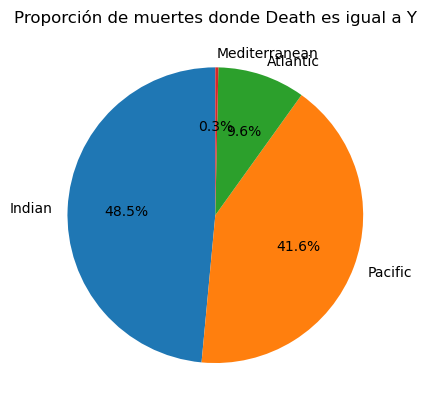

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado data_sin_inutil
# y quieres un diagrama de pastel para la proporción de 'Death' igual a 'Y' en cada 'Oceano'

# Filtra los datos donde 'Death' es igual a 'Y'
death_yes = data_sin_inutil[data_sin_inutil['Death'] == 'Y']

# Cuenta la frecuencia de cada 'Oceano' en los casos donde 'Death' es igual a 'Y'
oceano_counts = death_yes['Oceano'].value_counts()

# Crea un diagrama de pastel
plt.pie(oceano_counts, labels=oceano_counts.index, autopct='%1.1f%%', startangle=90)

# Título del diagrama de pastel
plt.title('Proporción de muertes donde Death es igual a Y')

# Mostrar el diagrama de pastel
plt.show()

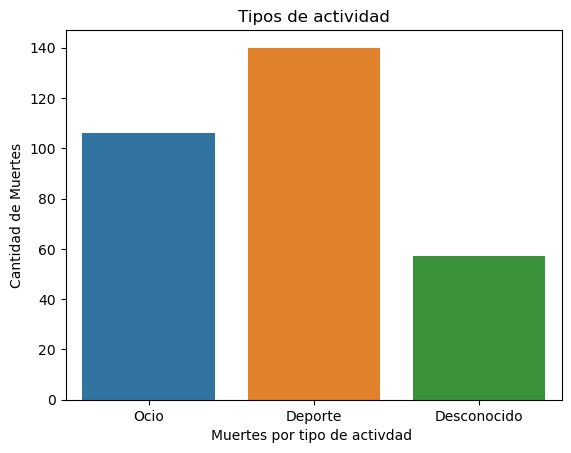

In [98]:
#Otro grafico de barras para ver la cantidad de muertes segun tipo de a
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Tipo de Actividad', data=death_yes)

# Etiquetas y título
plt.xlabel('Muertes por tipo de activdad ')
plt.ylabel('Cantidad de Muertes')
plt.title('Tipos de actividad')

# Mostrar el gráfico
plt.show()